In [1]:
import yfinance as yf
amazon_stock=yf.Ticker("AMZN")

In [2]:
amazon_stock_df=amazon_stock.history(period='2y')
amazon_stock_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-03,1935.890015,1941.589966,1930.500000,1939.000000,1690300,0,0
2019-07-05,1928.599976,1945.900024,1925.300049,1942.910034,2628400,0,0
2019-07-08,1934.119995,1956.000000,1928.250000,1952.319946,2883400,0,0
2019-07-09,1947.800049,1990.010010,1943.479980,1988.300049,4345700,0,0
2019-07-10,1996.510010,2024.939941,1995.400024,2017.410034,4931900,0,0


In [3]:
ebay_stock=yf.Ticker("EBAY")
ebay_stock_df=ebay_stock.history(period='2y')
ebay_stock_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-03,39.028155,39.125407,38.755840,38.804470,3419500,0.0,0
2019-07-05,38.668316,38.901728,38.376553,38.707218,3862400,0.0,0
2019-07-08,38.619688,38.707217,38.318202,38.454357,5477000,0.0,0
2019-07-09,38.493260,38.882275,38.434906,38.843372,5962900,0.0,0
2019-07-10,39.086507,39.271293,38.571061,38.911449,5443700,0.0,0


In [4]:
walmart_stock=yf.Ticker('WMT')
walmart_stock_df=walmart_stock.history(period='2y')
walmart_stock_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-03,107.460487,108.639673,107.286508,108.562347,3207300,0.0,0
2019-07-05,108.253054,108.485023,107.489483,108.233727,3579400,0.0,0
2019-07-08,108.175736,109.151948,107.963094,108.948975,4715700,0.0,0
2019-07-09,109.113282,109.586887,108.832983,109.103615,5423400,0.0,0
2019-07-10,109.335587,109.809192,108.630006,109.200272,4579000,0.0,0


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(amazon_stock_df[['Open']],amazon_stock_df[['Close']],test_size=0.3,random_state=0)




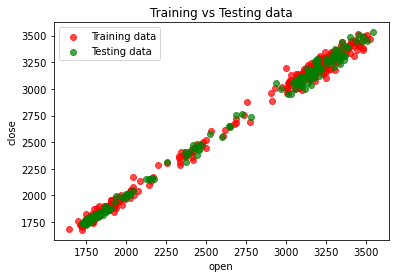

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,label='Training data',color='r',alpha=.7)
plt.scatter(x_test,y_test,label='Testing data',color='g',alpha=.7)
plt.title('Training vs Testing data')
plt.legend()
plt.xlabel('open')
plt.ylabel('close')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train.values,y_train.values)
prediction=lm.predict(x_train.values)

In [9]:
lm.score(x_test,y_test)

0.9957290012423874

/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


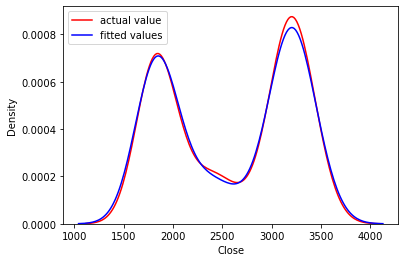

In [10]:
import seaborn as sns
ax1=sns.distplot(amazon_stock_df['Close'],hist=False,color="r",label="actual value");
sns.distplot(prediction,hist=False,color="b",label="fitted values",ax=ax1);
plt.legend()

In [11]:
import pandas as pd
import numpy as np
amazon_bins=np.linspace(min(amazon_stock_df['Open']),max(amazon_stock_df['Open']),4)
bins_names=['low','medium','high']
amazon_stock_df['Open_binned']=pd.cut(amazon_stock_df['Open'],amazon_bins,labels=bins_names,include_lowest=True)




Text(0.5, 1.0, 'High and low prices vs opend prices for amazon ')

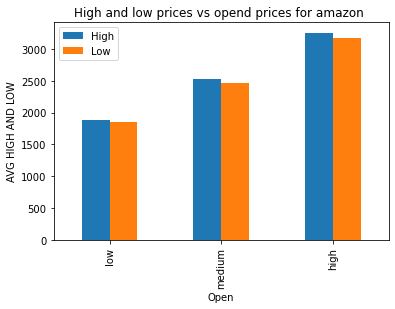

In [12]:
high_low_amazon_df=amazon_stock_df[['High','Low','Open_binned']].groupby(['Open_binned']).mean()
high_low_amazon_df.plot.bar(xlabel='Open',ylabel='AVG HIGH AND LOW')
plt.title('High and low prices vs opend prices for amazon ')

In [13]:
bins_ebay=np.linspace(min(ebay_stock_df['Open']),max(ebay_stock_df['Open']),4)
bins_name=['low','medium','high']
ebay_stock_df['Open_binned']=pd.cut(ebay_stock_df['Open'],bins_ebay,labels=bins_name,include_lowest=True)





Text(0.5, 1.0, 'High and low prices vs opend prices for ebay ')

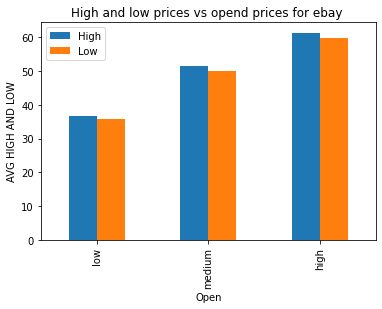

In [14]:
high_low_ebay_df=ebay_stock_df[['High','Low','Open_binned']].groupby(['Open_binned']).mean()
high_low_ebay_df.plot.bar(xlabel='Open',ylabel='AVG HIGH AND LOW')
plt.title('High and low prices vs opend prices for ebay ')

In [15]:
bins_walmart=np.linspace(min(walmart_stock_df['Open']),max(walmart_stock_df['Open']),4)
bin_names=['low','medium','high']
walmart_stock_df['Open_binned']=pd.cut(walmart_stock_df['Open'],bins_walmart,labels=bin_names,include_lowest=True)






Text(0.5, 1.0, 'High and low prices vs opend prices for walmart ')

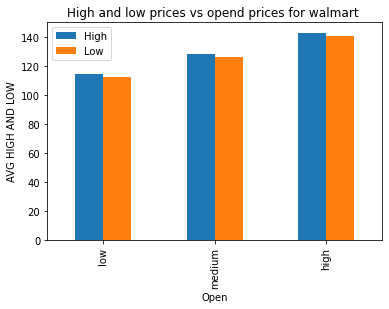

In [16]:
high_low_walmart_df=walmart_stock_df[['High','Low','Open_binned']].groupby(['Open_binned']).mean()
high_low_walmart_df.plot.bar(xlabel='Open',ylabel='AVG HIGH AND LOW')
plt.title('High and low prices vs opend prices for walmart ')

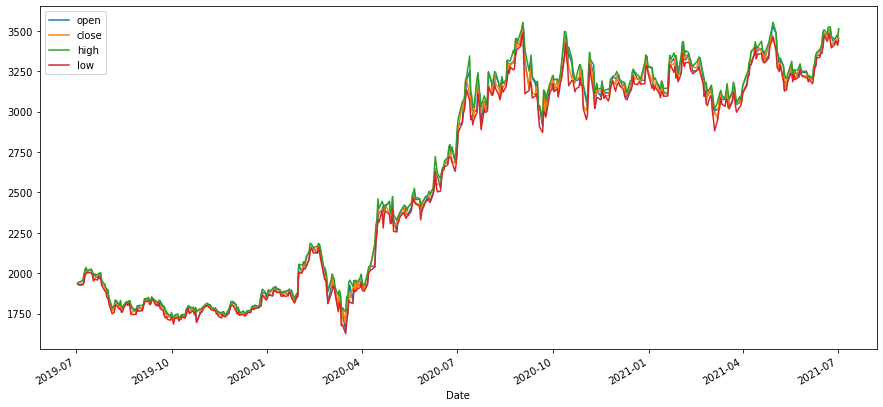

In [17]:
amazon_stock_df['Open'].plot(ylabel='',label='open',figsize=(15,7))
amazon_stock_df['Close'].plot(label='close')
amazon_stock_df['High'].plot(label='high')
amazon_stock_df['Low'].plot(label='low')
plt.legend()
plt.show()

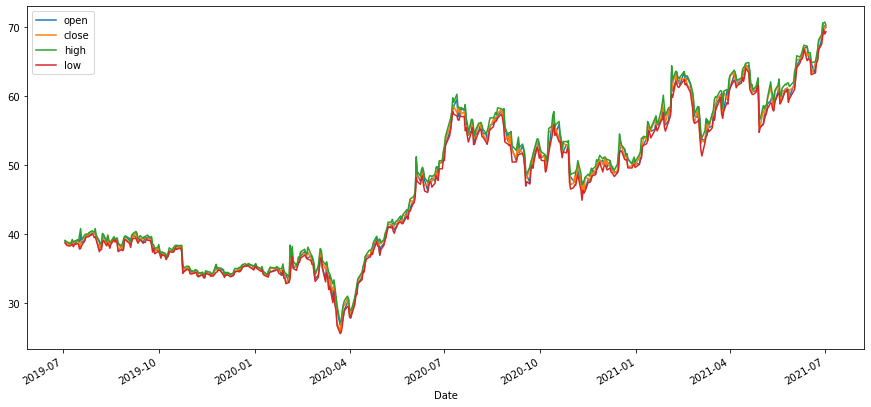

In [18]:
ebay_stock_df['Open'].plot(ylabel='',label='open',figsize=(15,7))
ebay_stock_df['Close'].plot(label='close')
ebay_stock_df['High'].plot(label='high')
ebay_stock_df['Low'].plot(label='low')
plt.legend()
plt.show()

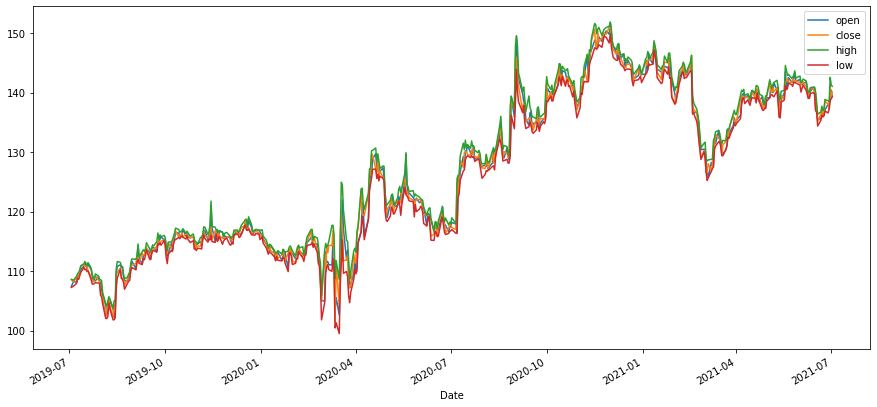

In [19]:
walmart_stock_df['Open'].plot(ylabel='',label='open',figsize=(15,7))
walmart_stock_df['Close'].plot(label='close')
walmart_stock_df['High'].plot(label='high')
walmart_stock_df['Low'].plot(label='low')
plt.legend()
plt.show()

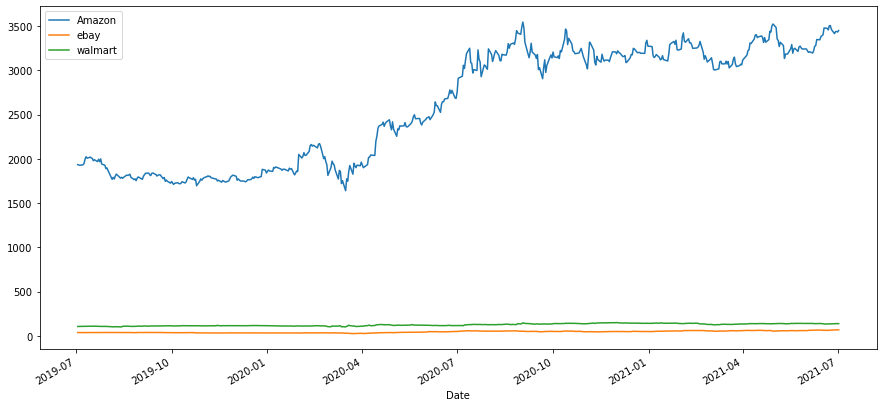

In [20]:
amazon_stock_df['Open'].plot(ylabel='',label='Amazon',figsize=(15,7))
ebay_stock_df['Open'].plot(label='ebay')
walmart_stock_df['Open'].plot(label='walmart')
plt.legend()
plt.show()

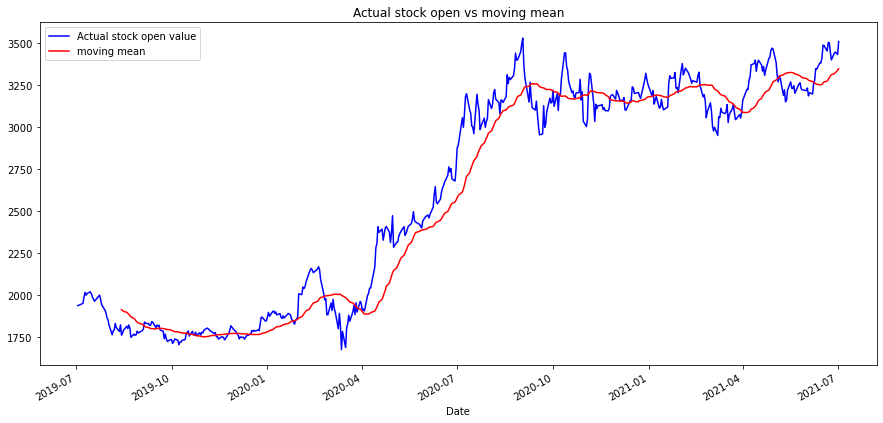

In [21]:
amazon_stock_df['Close'].plot(label='Actual stock open value',color='b',figsize=(15,7))
amazon_stock_df['MA30']=amazon_stock_df['Close'].rolling(30).mean()
amazon_stock_df['MA30'].plot(label='moving mean',color='r')
plt.legend()
plt.title('Actual stock open vs moving mean')
plt.ylabel='Close'

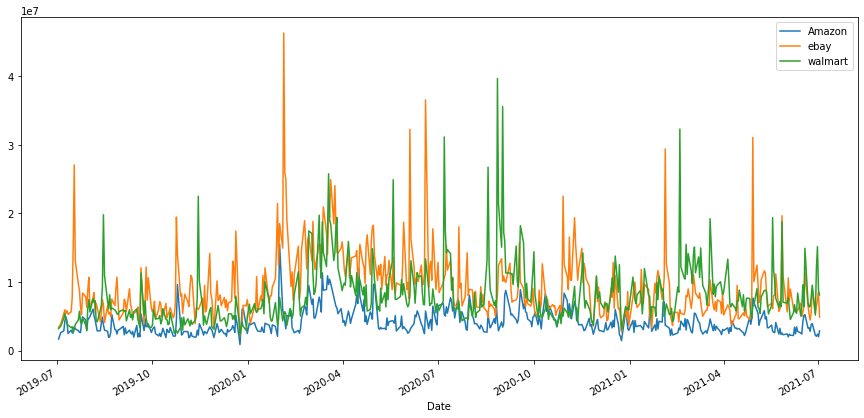

In [22]:
amazon_stock_df['Volume'].plot(ylabel='',label='Amazon',figsize=(15,7))
ebay_stock_df['Volume'].plot(label='ebay')
walmart_stock_df['Volume'].plot(label='walmart')
plt.legend()
plt.show()

In [23]:
amazon_stock_df.reset_index(inplace=True)
amazon_returns_df=amazon_stock_df[['Date','Close']]
amazon_returns_df.rename(columns={'Close':'p_t'},inplace=True)
amazon_returns_df['p_t-1']=amazon_returns_df['p_t'].shift(1)
amazon_returns_df['return']=(amazon_returns_df['p_t']/amazon_returns_df['p_t-1'])-1
amazon_returns_df

/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-23-19f26f6db70b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_returns_df['p_t-1']=amazon_returns_df['p_t'].shift(1)
<ipython-input-23-19f26f6db70b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Date,p_t,p_t-1,return
0,2019-07-03,1939.000000,NaN,NaN
1,2019-07-05,1942.910034,1939.000000,0.002017
2,2019-07-08,1952.319946,1942.910034,0.004843
3,2019-07-09,1988.300049,1952.319946,0.018429
4,2019-07-10,2017.410034,1988.300049,0.014641
...,...,...,...,...
500,2021-06-28,3443.889893,3401.459961,0.012474
501,2021-06-29,3448.139893,3443.889893,0.001234
502,2021-06-30,3440.159912,3448.139893,-0.002314
503,2021-07-01,3432.969971,3440.159912,-0.002090


<AxesSubplot:>

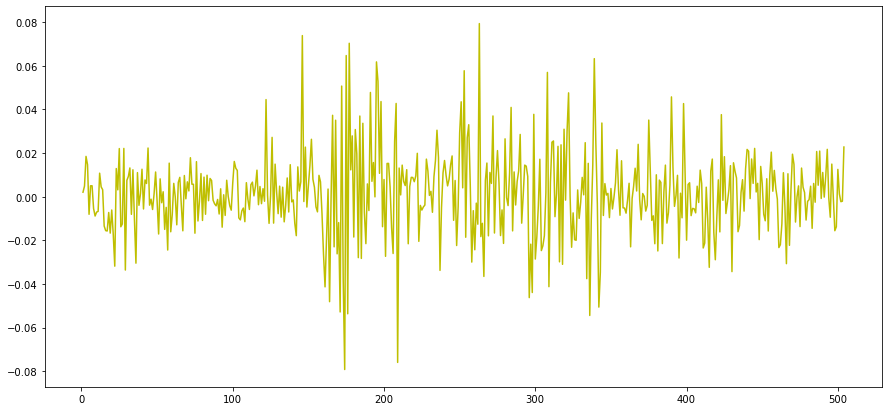

In [24]:
amazon_returns_df['return'].plot(color='y',figsize=(15,7))

In [25]:
ebay_stock_df.reset_index(inplace=True)
ebay_stock_df.iloc[[ebay_stock_df['Volume'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_binned
148,2020-02-04,34.388876,38.454799,33.634479,36.652077,46298200,0.0,0,low


<AxesSubplot:>

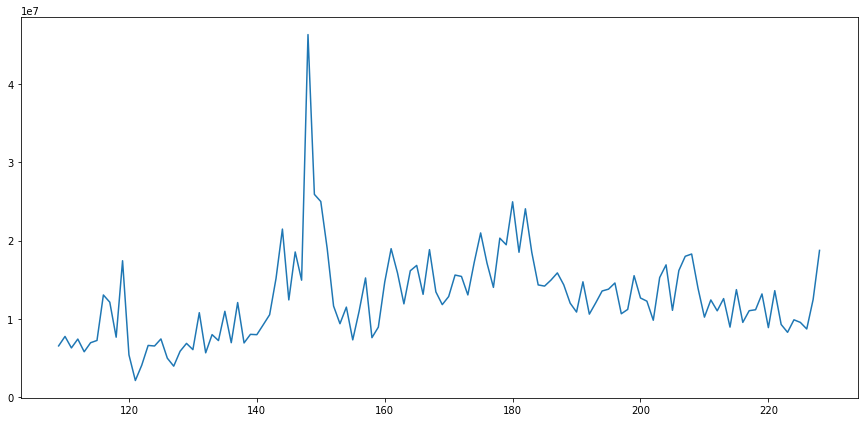

In [26]:
ebay_stock_df.iloc[109:229]['Volume'].plot(figsize=(15,7))

In [27]:
amazon_stock_df['return']=amazon_returns_df['return']
amazon_stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_binned,MA30,return
0,2019-07-03,1935.890015,1941.589966,1930.500000,1939.000000,1690300,0,0,low,NaN,NaN
1,2019-07-05,1928.599976,1945.900024,1925.300049,1942.910034,2628400,0,0,low,NaN,0.002017
2,2019-07-08,1934.119995,1956.000000,1928.250000,1952.319946,2883400,0,0,low,NaN,0.004843
3,2019-07-09,1947.800049,1990.010010,1943.479980,1988.300049,4345700,0,0,low,NaN,0.018429
4,2019-07-10,1996.510010,2024.939941,1995.400024,2017.410034,4931900,0,0,low,NaN,0.014641
...,...,...,...,...,...,...,...,...,...,...,...
500,2021-06-28,3416.000000,3448.000000,3413.510010,3443.889893,2242800,0,0,high,3320.308993,0.012474
501,2021-06-29,3438.820068,3456.030029,3423.030029,3448.139893,2098400,0,0,high,3326.233993,0.001234
502,2021-06-30,3441.060059,3471.600098,3435.000000,3440.159912,2404000,0,0,high,3333.163322,-0.002314
503,2021-07-01,3434.610107,3457.000000,3409.419922,3432.969971,2034200,0,0,high,3339.868986,-0.002090


Text(0.5, 0, 'Daily change or return')

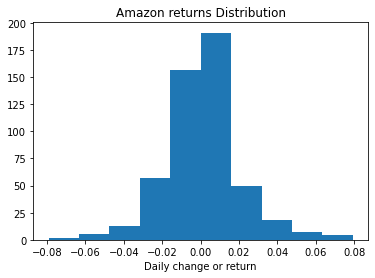

In [29]:
plt.hist(amazon_returns_df['return']);
plt.title('Amazon returns Distribution')
plt.xlabel('Daily change or return')


In [30]:
walmart_stock_df.reset_index(inplace=True)
walmart_returns_df=walmart_stock_df[['Date','Close']]
walmart_returns_df.rename(columns={'Close':'p_t'},inplace=True)
walmart_returns_df['p_t-1']=walmart_returns_df['p_t'].shift(1)
walmart_returns_df['return']=(walmart_returns_df['p_t']/walmart_returns_df['p_t-1'])-1
walmart_returns_df

/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-30-ea557886ccab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_returns_df['p_t-1']=walmart_returns_df['p_t'].shift(1)
<ipython-input-30-ea557886ccab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,p_t,p_t-1,return
0,2019-07-03,108.562347,NaN,NaN
1,2019-07-05,108.233727,108.562347,-0.003027
2,2019-07-08,108.948975,108.233727,0.006608
3,2019-07-09,109.103615,108.948975,0.001419
4,2019-07-10,109.200272,109.103615,0.000886
...,...,...,...,...
500,2021-06-28,138.100006,138.529999,-0.003104
501,2021-06-29,137.300003,138.100006,-0.005793
502,2021-06-30,141.020004,137.300003,0.027094
503,2021-07-01,139.320007,141.020004,-0.012055


In [31]:
walmart_stock_df['return']=walmart_returns_df['return']

Text(0.5, 1.0, 'Walmart returns Distribution')

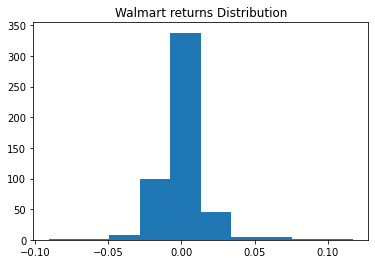

In [35]:
plt.hist(walmart_stock_df['return'])
plt.title('Walmart returns Distribution')

<AxesSubplot:>

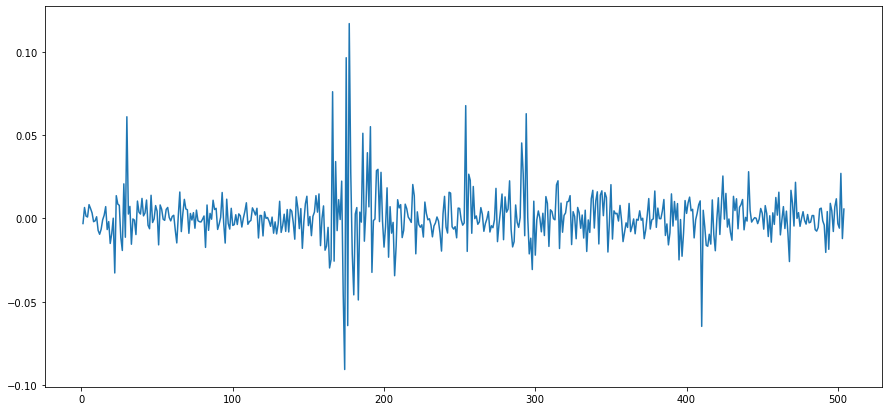

In [33]:
walmart_stock_df['return'].plot(figsize=(15,7))

In [37]:
#del ebay_stock_df['level_0']
#del ebay_stock_df['index']
ebay_stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_binned
0,2019-07-03,39.028155,39.125407,38.755840,38.804470,3419500,0.0,0,low
1,2019-07-05,38.668316,38.901728,38.376553,38.707218,3862400,0.0,0,low
2,2019-07-08,38.619688,38.707217,38.318202,38.454357,5477000,0.0,0,low
3,2019-07-09,38.493260,38.882275,38.434906,38.843372,5962900,0.0,0,low
4,2019-07-10,39.086507,39.271293,38.571061,38.911449,5443700,0.0,0,low


In [38]:
ebay_returns_df=ebay_stock_df[['Date','Close']]
ebay_returns_df.rename(columns={'Close':'p_t'},inplace=True)
ebay_returns_df['p_t-1']=ebay_returns_df['p_t'].shift(1)
ebay_returns_df['return']=(ebay_returns_df['p_t']/ebay_returns_df['p_t-1'])-1
ebay_returns_df

/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-38-aaabee597f66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebay_returns_df['p_t-1']=ebay_returns_df['p_t'].shift(1)
<ipython-input-38-aaabee597f66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Date,p_t,p_t-1,return
0,2019-07-03,38.804470,NaN,NaN
1,2019-07-05,38.707218,38.804470,-0.002506
2,2019-07-08,38.454357,38.707218,-0.006533
3,2019-07-09,38.843372,38.454357,0.010116
4,2019-07-10,38.911449,38.843372,0.001753
...,...,...,...,...
500,2021-06-28,68.820000,67.900002,0.013549
501,2021-06-29,70.489998,68.820000,0.024266
502,2021-06-30,70.209999,70.489998,-0.003972
503,2021-07-01,69.800003,70.209999,-0.005840


In [39]:
ebay_stock_df['return']=ebay_returns_df['return']

Text(0.5, 1.0, 'ebay returns distribution')

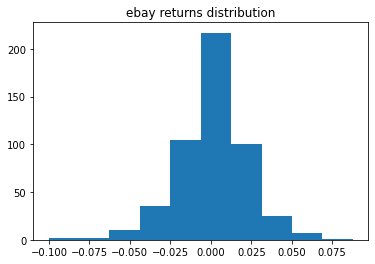

In [40]:
plt.hist(ebay_stock_df['return'])
plt.title('ebay returns distribution')

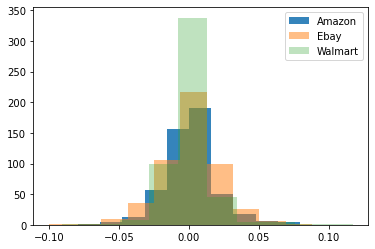

In [41]:
plt.hist(amazon_returns_df['return'],label='Amazon',alpha=0.9);
plt.hist(ebay_returns_df['return'],label='Ebay',alpha=0.5);
plt.hist(walmart_returns_df['return'],label='Walmart',alpha=0.3);
plt.legend();

<AxesSubplot:>

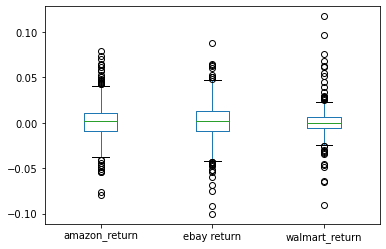

In [42]:
stocks_return_df=pd.concat([amazon_stock_df['return'],ebay_stock_df['return'],walmart_stock_df['return']],axis=1)
stocks_return_df.columns=['amazon_return','ebay return','walmart_return']
stocks_return_df.plot(kind='box')